In [14]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [15]:
basedir = os.getcwd()
datadir = basedir + '/Data'

In [16]:
data = pd.read_csv(datadir + '/X_processed.csv', low_memory = False, index_col = 0)
y_predict = pd.read_csv(datadir + '/y_processed.csv', low_memory = False, index_col = 0)
y_predict2 = pd.read_csv(datadir + '/y2_processed.csv', low_memory = False, index_col = 0)
OTUref = pd.read_csv(datadir + '/otu_annotation.csv', index_col = 0)

# Subset by body site

In [75]:
bodysites = ['BodySite_Cord Blood (Serum)', 'BodySite_Saliva','BodySite_Skin','BodySite_Stool','BodySite_Tooth_Gum','BodySite_Urine','BodySite_Vaginal_Swab']
site = data[bodysites].idxmax(axis=1)
site_X = dict()
for col in bodysites:
    site_X[col] = data[data[col]==1]
    site_X[col].drop(bodysites, axis=1, inplace = True)

/Users/atang2/anaconda3/envs/deepehr/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/atang2/anaconda3/envs/deepehr/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/atang2/anaconda3/envs/deepehr/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

# Dimensionality Reduction (to visualize data)

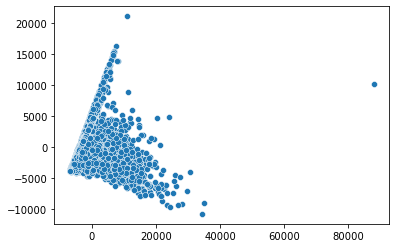

<AxesSubplot:>

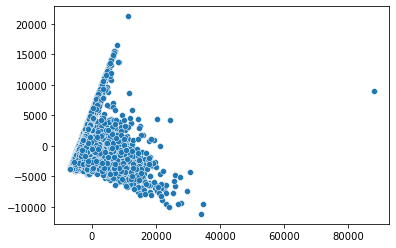

In [69]:
from sklearn.decomposition import PCA, IncrementalPCA
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html#sphx-glr-auto-examples-decomposition-plot-incremental-pca-py

X = data.to_numpy()

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

sns.scatterplot(X_pca[:,0], X_pca[:,1]); plt.show()
sns.scatterplot(X_ipca[:,0], X_ipca[:,1])

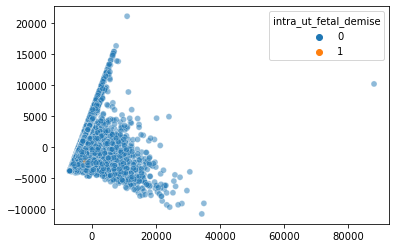

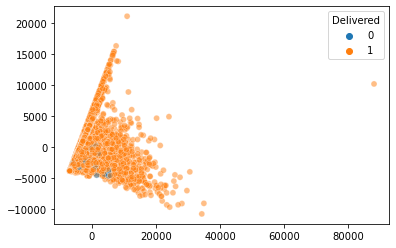

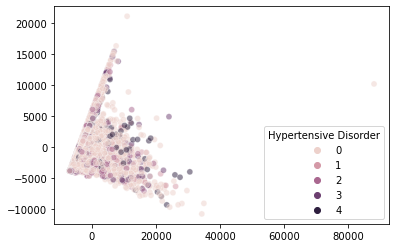

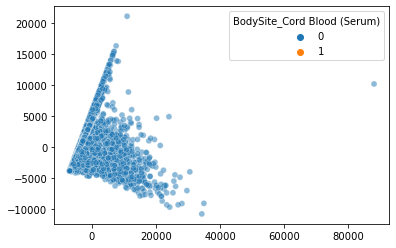

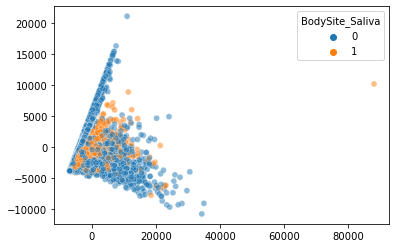

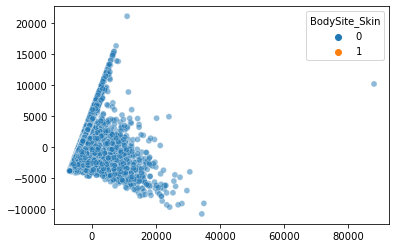

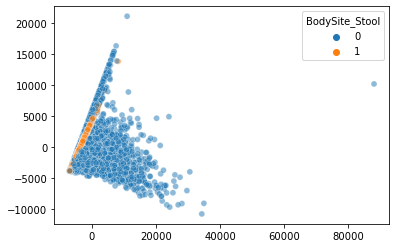

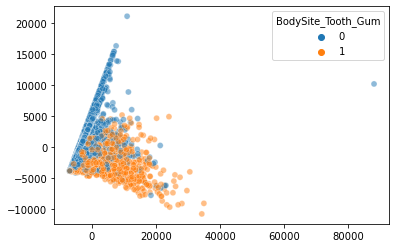

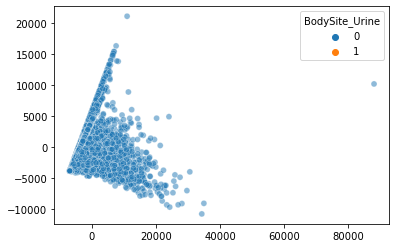

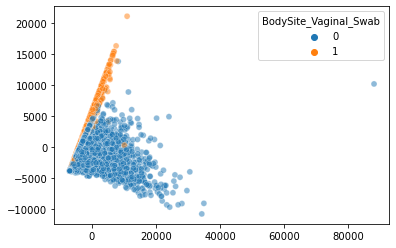

In [19]:
for col in y_predict.columns:
    sns.scatterplot(X_pca[:,0], X_pca[:,1], hue = y_predict[col], alpha = .5)
    plt.show()
    
for col in bodysites:
    sns.scatterplot(X_pca[:,0], X_pca[:,1], hue = data[col], alpha = .5)
    plt.show()

BodySite_Cord Blood (Serum)


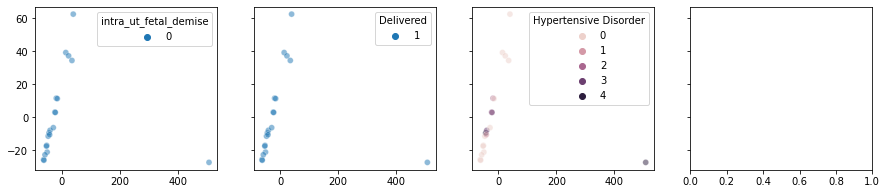

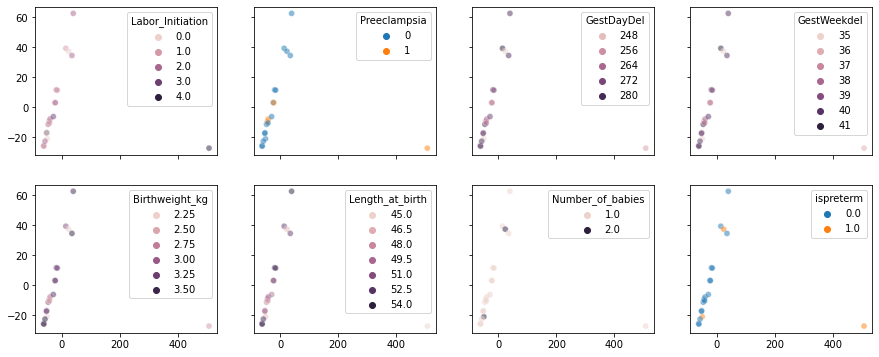

BodySite_Saliva


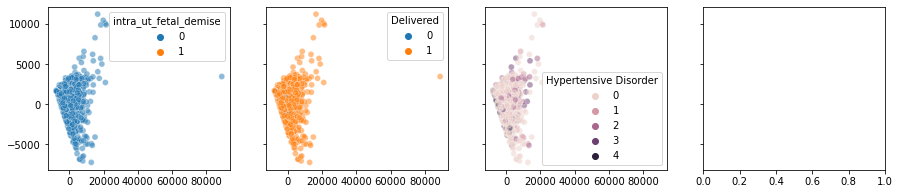

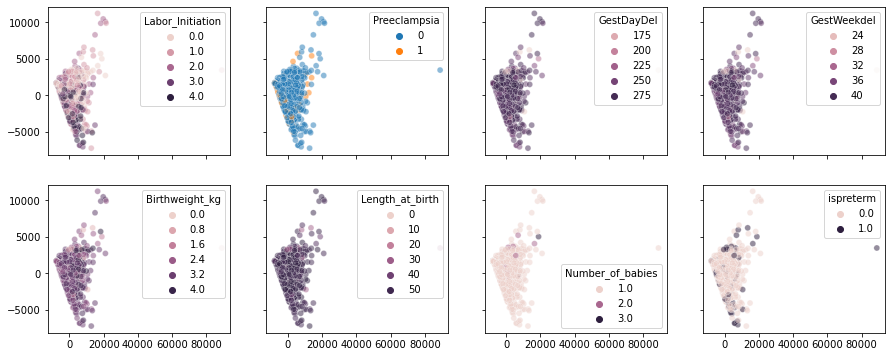

BodySite_Skin


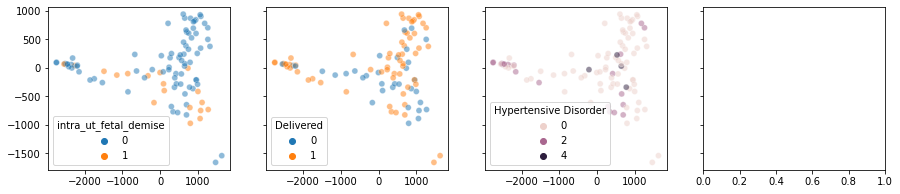

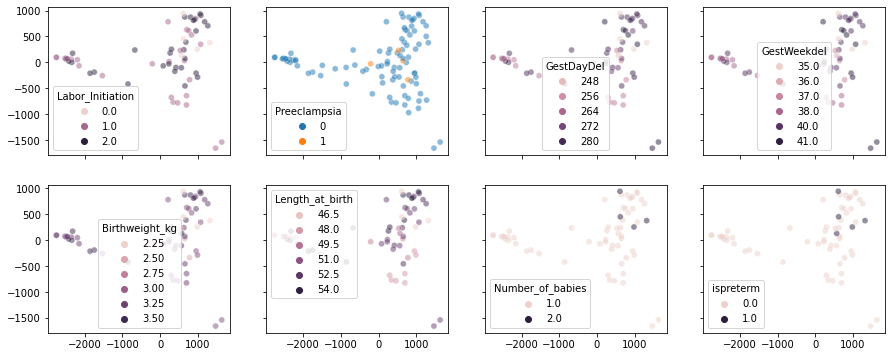

BodySite_Stool


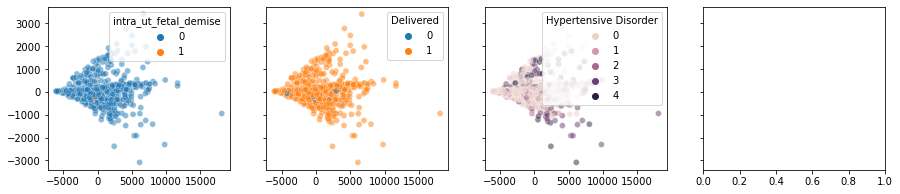

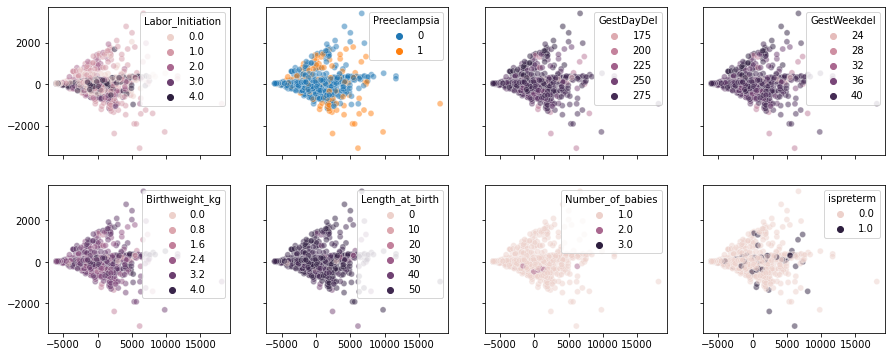

BodySite_Tooth_Gum


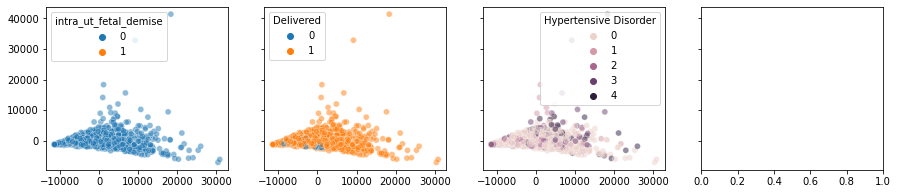

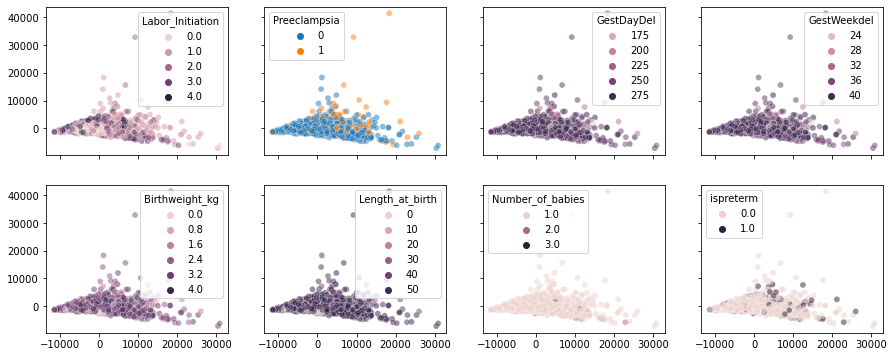

BodySite_Urine


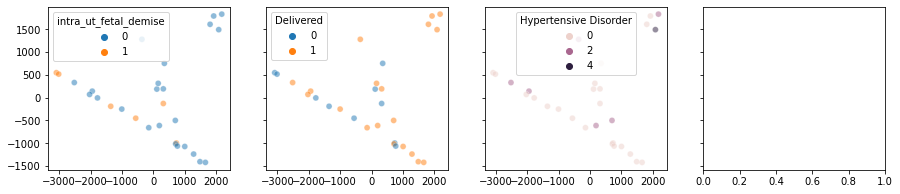

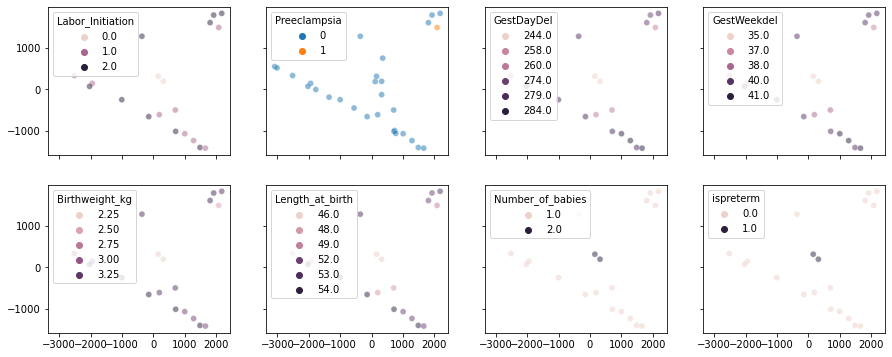

BodySite_Vaginal_Swab


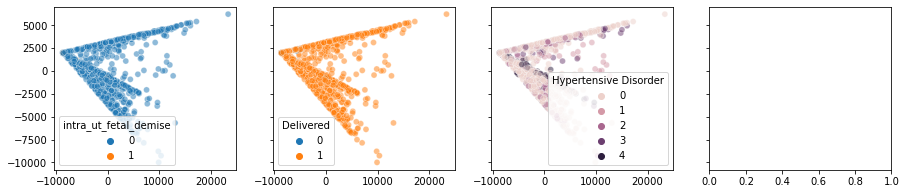

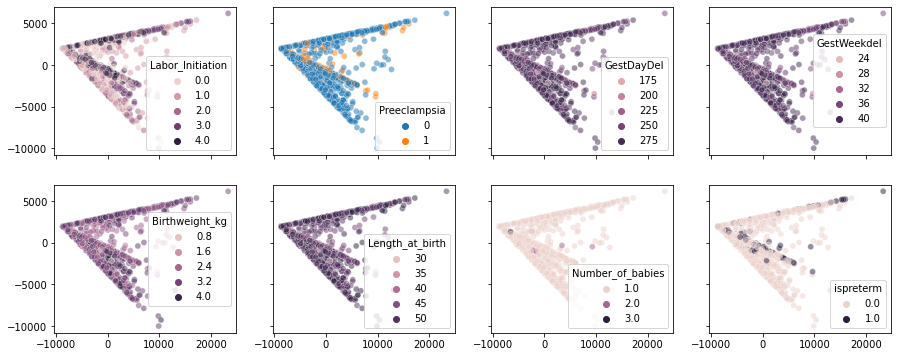

In [20]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

for g in site_X:
    print(g)
    X = site_X[g].to_numpy()
    ipca = IncrementalPCA(n_components=n_components, batch_size=10)
    X_pca = ipca.fit_transform(X)
    fig, ax = plt.subplots(1,4, figsize = (15,3), sharey = True)
    for i, col in enumerate(y_predict.columns):
        sns.scatterplot(X_pca[:,0], X_pca[:,1], hue = y_predict.loc[site_X[g].index,col], alpha = .5, ax = ax[i])
    plt.show()
    
    fig, ax = plt.subplots(2,4, figsize = (15,6), sharey = True, sharex = True)
    for i, col in enumerate(y_predict2.columns):
        sns.scatterplot(X_pca[:,0], X_pca[:,1], hue = y_predict2.loc[site_X[g].index,col], alpha = .5, ax = ax[int(i/4),int(i%4)])
    plt.show()
    
    print('='*40)

In [21]:
import umap

In [22]:
X = data.to_numpy()
model = umap.UMAP()
X_embed = model.fit_transform(X)

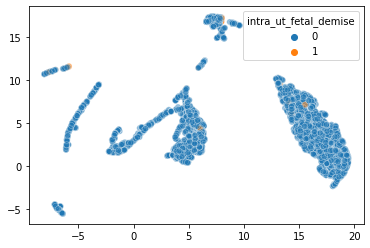

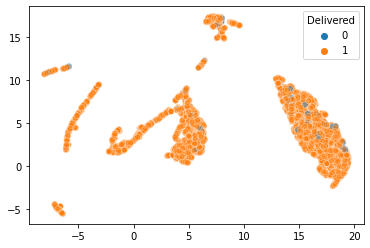

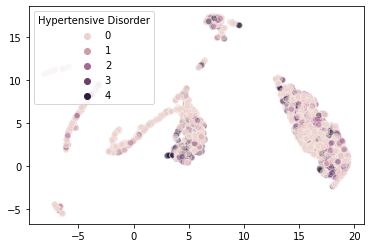

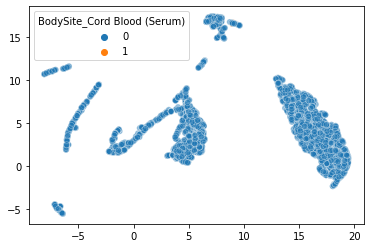

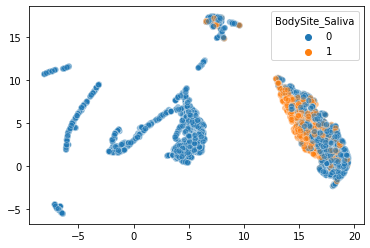

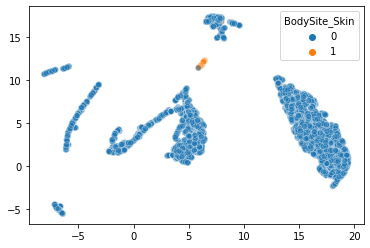

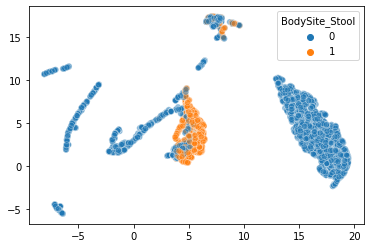

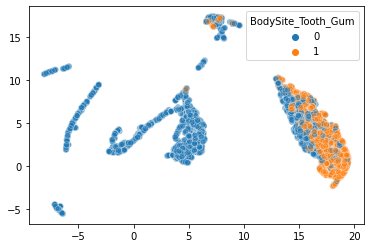

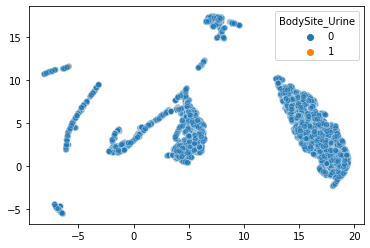

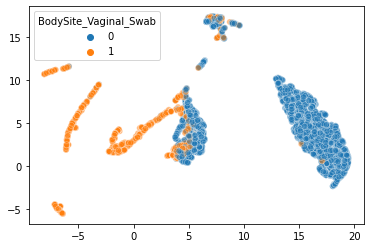

In [23]:
for col in y_predict.columns:
    sns.scatterplot(X_embed[:,0], X_embed[:,1], hue = y_predict[col], alpha = .5)
    plt.show()
    
for col in bodysites:
    sns.scatterplot(X_embed[:,0], X_embed[:,1], hue = data[col], alpha = .5)
    plt.show()

BodySite_Cord Blood (Serum)


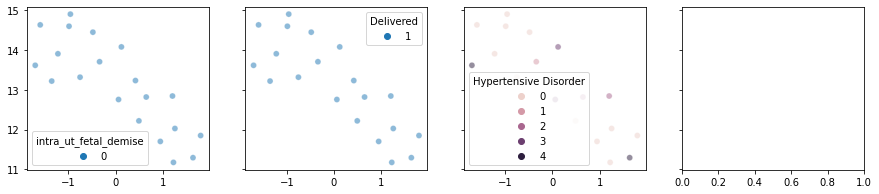

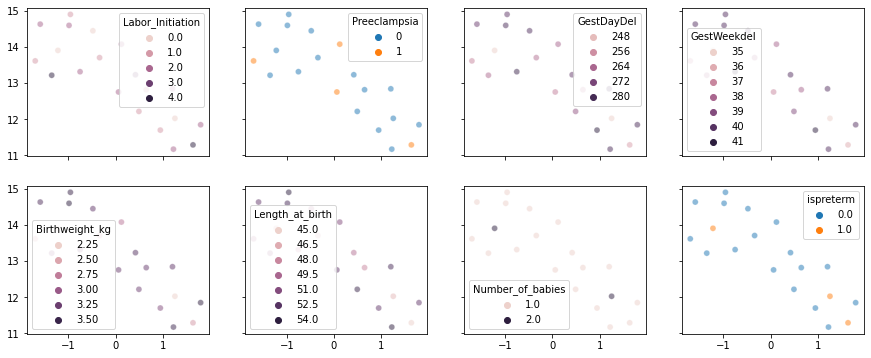

BodySite_Saliva


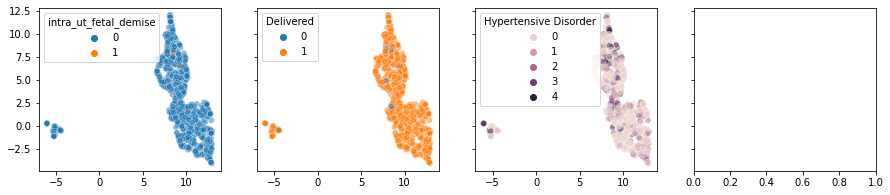

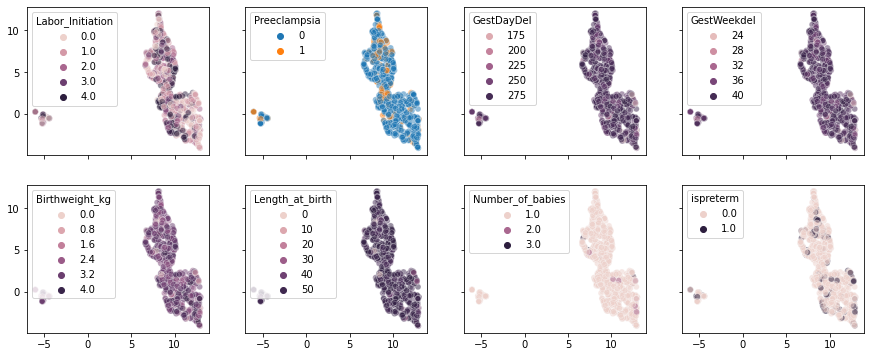

BodySite_Skin


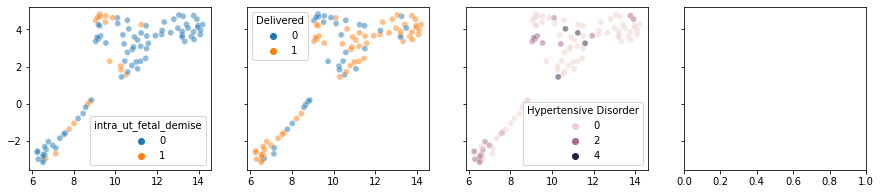

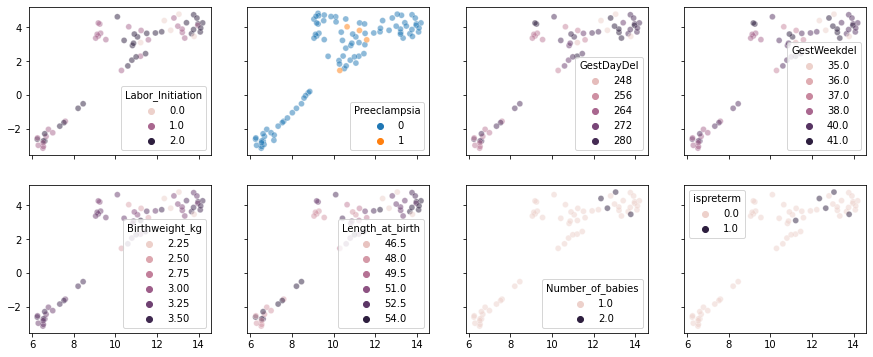

BodySite_Stool


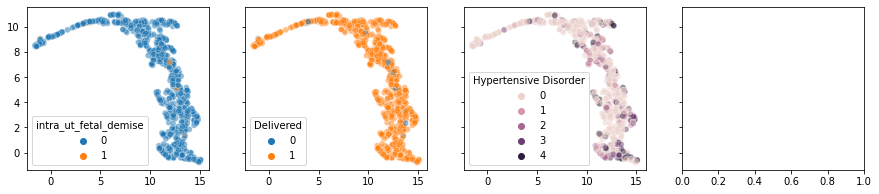

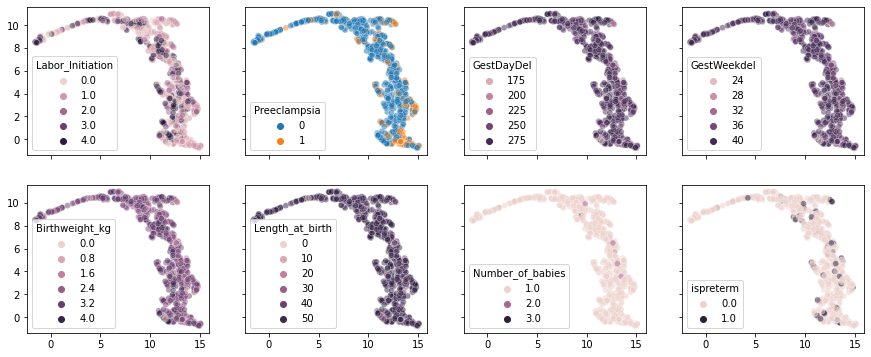

BodySite_Tooth_Gum


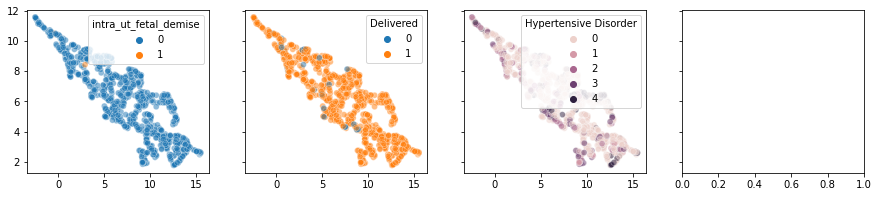

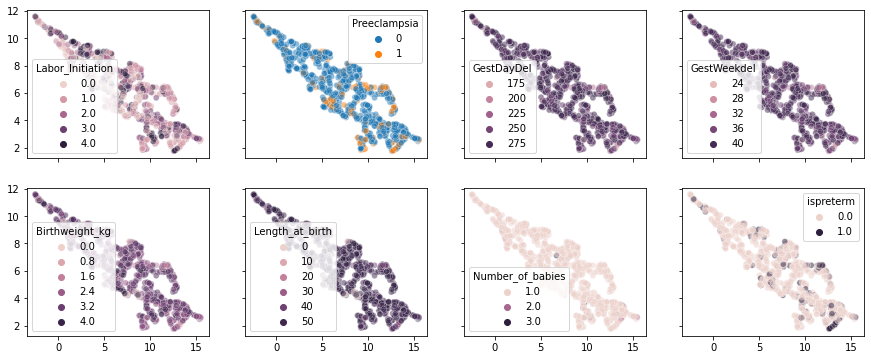

BodySite_Urine


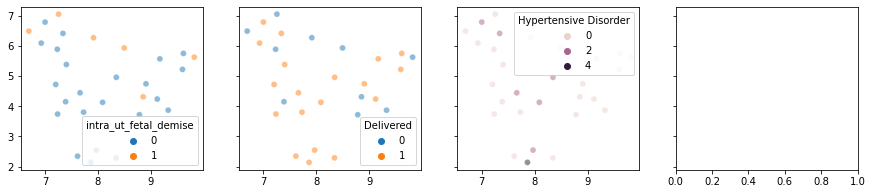

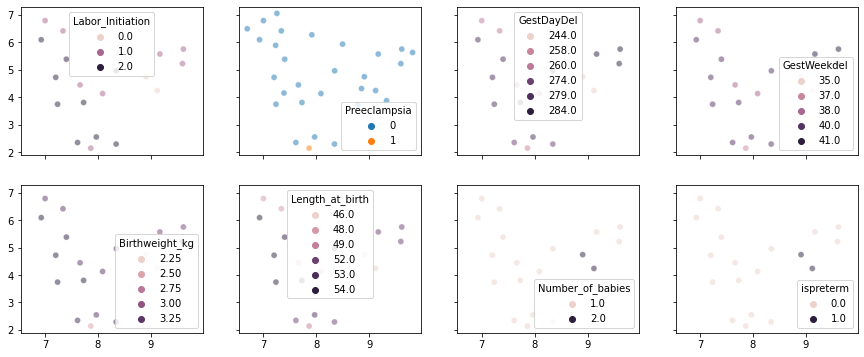

BodySite_Vaginal_Swab


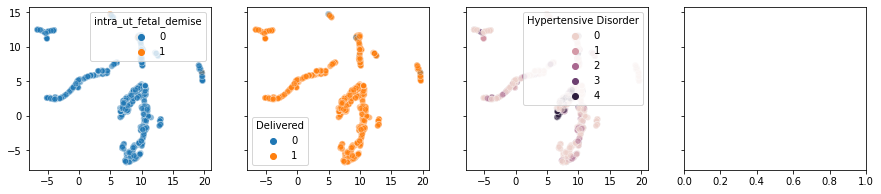

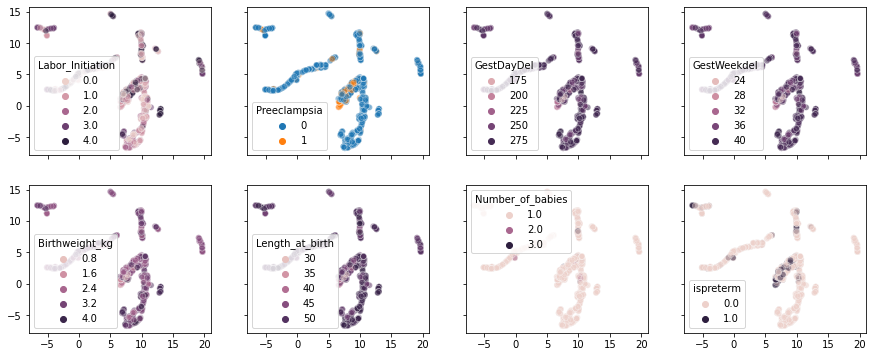

In [24]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

for g in site_X:
    print(g)
    X = site_X[g].to_numpy()
    model = umap.UMAP()
    X_embed = model.fit_transform(X)
    fig, ax = plt.subplots(1,4, figsize = (15,3), sharey = True)
    for i, col in enumerate(y_predict.columns):
        sns.scatterplot(X_embed[:,0], X_embed[:,1], hue = y_predict.loc[site_X[g].index,col], alpha = .5, ax = ax[i])
    plt.show()
    
    fig, ax = plt.subplots(2,4, figsize = (15,6), sharey = True, sharex = True)
    for i, col in enumerate(y_predict2.columns):
        sns.scatterplot(X_embed[:,0], X_embed[:,1], hue = y_predict2.loc[site_X[g].index,col], alpha = .5, ax = ax[int(i/4),int(i%4)])
    plt.show()
    
    print('='*40)

# Unsupervised Learning

In [25]:
from sklearn.cluster import KMeans
X = data.to_numpy()
model = umap.UMAP()
X_embed = model.fit_transform(X)

<AxesSubplot:>

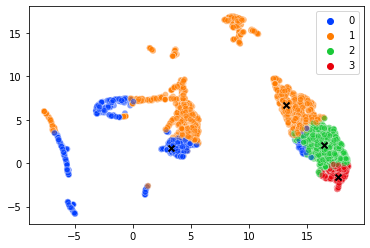

In [49]:
# cluster original data
kmeans = KMeans(n_clusters=4, random_state = 40).fit(X)
modelcenters = model.transform(kmeans.cluster_centers_)
sns.scatterplot(X_embed[:,0], X_embed[:,1], hue = kmeans.predict(X), alpha = .5, palette = 'bright')
sns.scatterplot(modelcenters[:,0],modelcenters[:,1], color = 'k', marker = 'x', linewidth = 2)

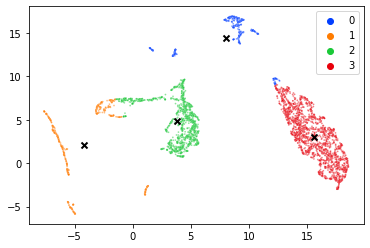

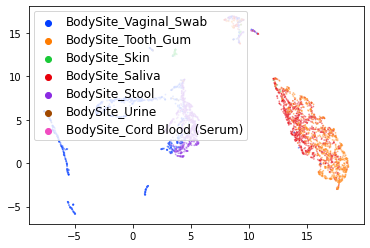

In [90]:
# cluster umap
kmeans = KMeans(n_clusters=4, random_state = 40).fit(X_embed)
modelcenters = kmeans.cluster_centers_
sns.scatterplot(X_embed[:,0], X_embed[:,1], hue = kmeans.predict(X_embed), alpha = .5, palette = 'bright', s = 3)
sns.scatterplot(modelcenters[:,0],modelcenters[:,1], color = 'k', marker = 'x', linewidth = 2)
plt.show()
g = sns.scatterplot(X_embed[:,0], X_embed[:,1], hue = site, alpha = .5, palette = 'bright', s = 3)
plt.setp(g.get_legend().get_texts(), fontsize = 12);

<AxesSubplot:>

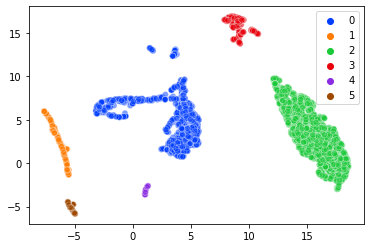

In [54]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=2).fit(X_embed)
sns.scatterplot(X_embed[:,0], X_embed[:,1], hue = clustering.labels_, alpha = .5, palette = 'bright')


In [74]:
data[bodysites].idxmax(axis=1)

1000501278           BodySite_Vaginal_Swab
1000101018           BodySite_Vaginal_Swab
1000101028           BodySite_Vaginal_Swab
1000301298           BodySite_Vaginal_Swab
1000301308           BodySite_Vaginal_Swab
                             ...          
1004604448.rs           BodySite_Tooth_Gum
1010104488.rs           BodySite_Tooth_Gum
1002402218.ca2.rs           BodySite_Stool
1002302248.bn1.rs           BodySite_Stool
1002102208.ak2.rs           BodySite_Stool
Length: 4044, dtype: object

# Supervised Learning

All data
		Training accuracy: 1.0


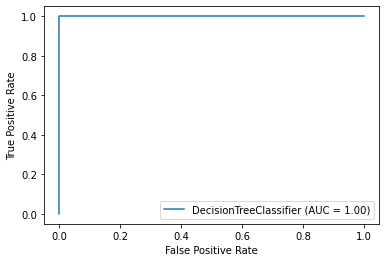

		Testing accuracy: 0.987220447284345


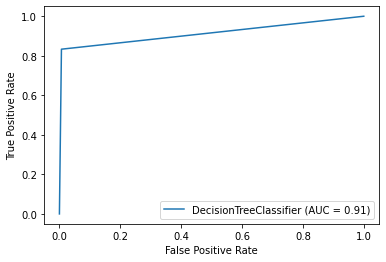

		Training accuracy: 1.0


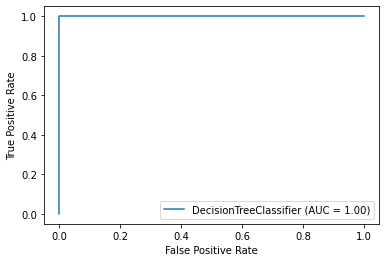

		Testing accuracy: 0.9808306709265175


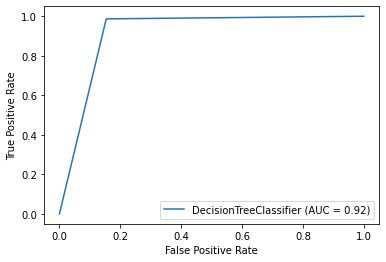

		Training accuracy: 1.0
		Testing accuracy: 1.0
		Training accuracy: 1.0
		Testing accuracy: 0.8210862619808307
BodySite_Cord Blood (Serum)
(20, 1959)
Not enough samples.
BodySite_Saliva
(1025, 1959)
	 intra_ut_fetal_demise
		Training accuracy: 1.0


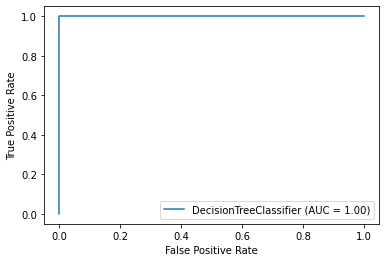

		Testing accuracy: 1.0


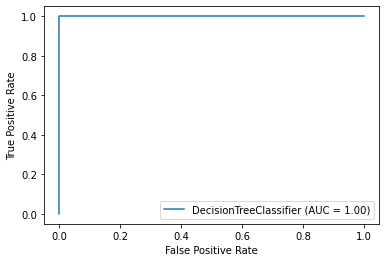

	 Delivered
		Training accuracy: 1.0


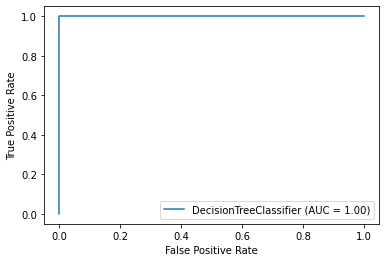

		Testing accuracy: 0.9805194805194806


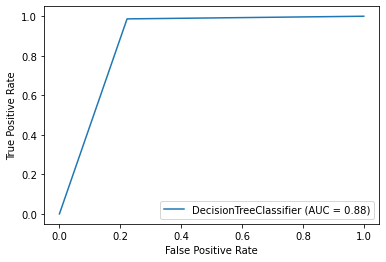

	 PPROM
		Training accuracy: 1.0
		Testing accuracy: 1.0
	 Hypertensive Disorder
		Training accuracy: 1.0
		Testing accuracy: 0.8376623376623377
BodySite_Skin
(95, 1959)
	 intra_ut_fetal_demise
		Training accuracy: 1.0


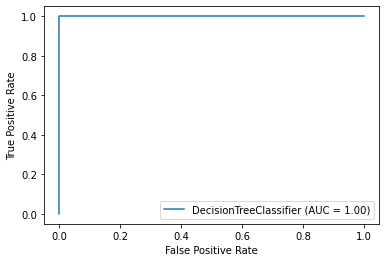

		Testing accuracy: 1.0


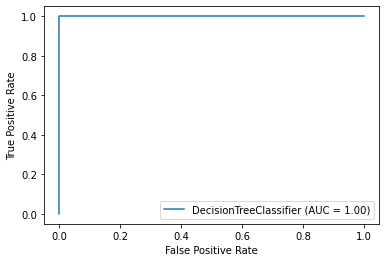

	 Delivered
		Training accuracy: 1.0


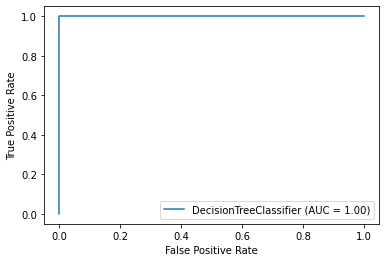

		Testing accuracy: 1.0


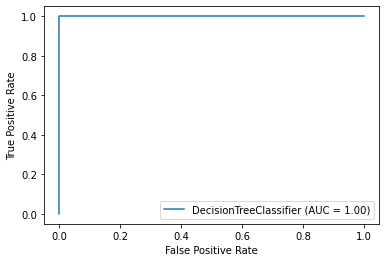

	 PPROM
		Training accuracy: 1.0
		Testing accuracy: 1.0
	 Hypertensive Disorder
		Training accuracy: 1.0
		Testing accuracy: 0.9655172413793104
BodySite_Stool
(868, 1959)
	 intra_ut_fetal_demise
		Training accuracy: 1.0


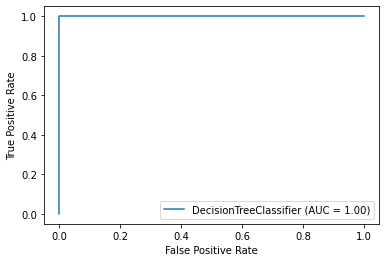

		Testing accuracy: 1.0


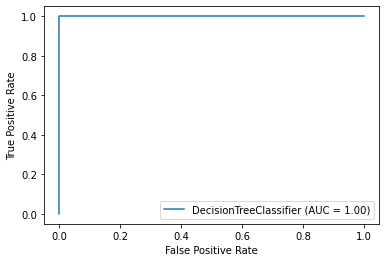

	 Delivered
		Training accuracy: 1.0


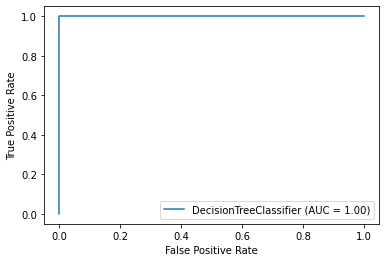

		Testing accuracy: 0.9961685823754789


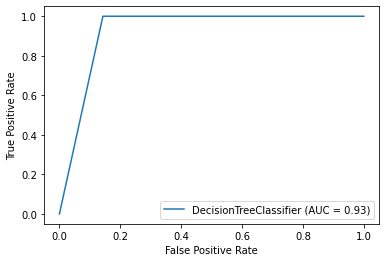

	 PPROM
		Training accuracy: 1.0
		Testing accuracy: 1.0
	 Hypertensive Disorder
		Training accuracy: 1.0
		Testing accuracy: 0.9272030651340997
BodySite_Tooth_Gum
(966, 1959)
	 intra_ut_fetal_demise
		Training accuracy: 1.0


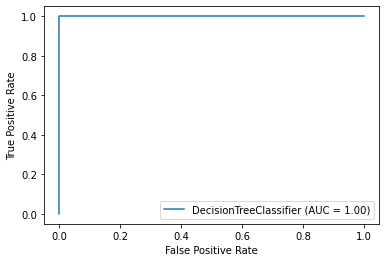

		Testing accuracy: 0.996551724137931


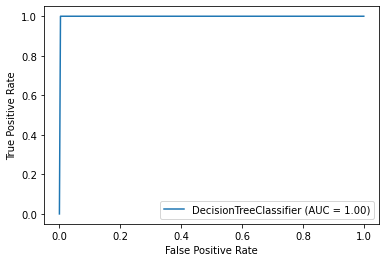

	 Delivered
		Training accuracy: 1.0


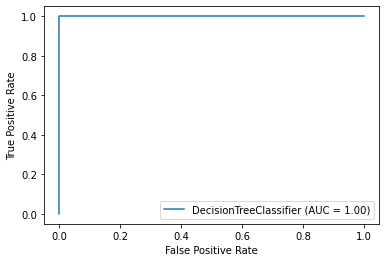

		Testing accuracy: 0.9689655172413794


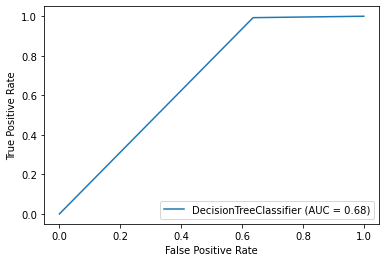

	 PPROM
		Training accuracy: 1.0
		Testing accuracy: 1.0
	 Hypertensive Disorder
		Training accuracy: 1.0
		Testing accuracy: 0.8551724137931035
BodySite_Urine
(29, 1959)
Not enough samples.
BodySite_Vaginal_Swab
(1041, 1959)
	 intra_ut_fetal_demise
		Training accuracy: 1.0


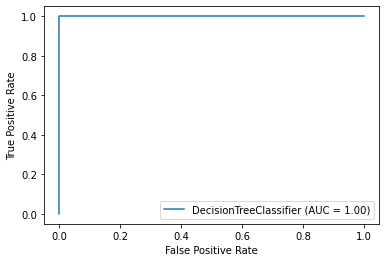

		Testing accuracy: 0.987220447284345


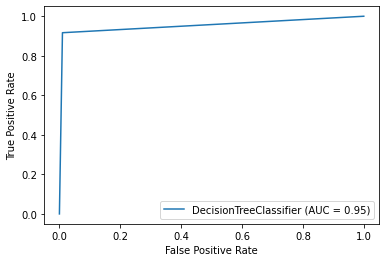

	 Delivered
		Training accuracy: 1.0


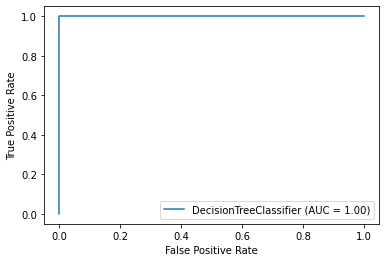

		Testing accuracy: 0.9840255591054313


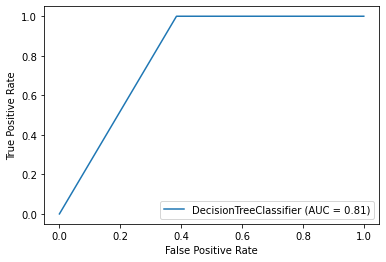

	 PPROM
		Training accuracy: 1.0
		Testing accuracy: 1.0
	 Hypertensive Disorder
		Training accuracy: 1.0
		Testing accuracy: 0.8338658146964856


In [10]:
# simple classification 
from sklearn import tree
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.model_selection import train_test_split

treemodels = list()

print('All data')
X_train, X_test, y_train, y_test = train_test_split(X, y_predict.loc[site_X[g].index], test_size=0.3, random_state=42)
for col in y_predict.columns:
    clf1 = tree.DecisionTreeClassifier().fit(X_train, y_train[col])
    treemodels.append(clf1)
    ypred = clf1.predict(X_train)
    print('\t\tTraining accuracy:',accuracy_score(y_train[col], ypred))
    if y_predict[col].nunique() == 2: plot_roc_curve(clf1, X_train, y_train[col]); plt.show();
    ypred2 = clf1.predict(X_test)
    print('\t\tTesting accuracy:',accuracy_score(y_test[col], ypred2))
    if y_predict[col].nunique() == 2: plot_roc_curve(clf1, X_test, y_test[col]); plt.show();

for g in site_X:
    print(g)
    X = site_X[g].to_numpy()
    print(X.shape)
    if X.shape[0]>30:
        X_train, X_test, y_train, y_test = train_test_split(X, y_predict.loc[site_X[g].index], test_size=0.3, random_state=42)
        for col in y_predict.columns:
            print('\t',col)
            clf = tree.DecisionTreeClassifier().fit(X_train, y_train[col])
            treemodels.append(clf)
            ypred = clf.predict(X_train)
            print('\t\tTraining accuracy:',accuracy_score(y_train[col], ypred))
            if y_predict[col].nunique() == 2: plot_roc_curve(clf, X_train, y_train[col]); plt.show();
            ypred2 = clf.predict(X_test)
            print('\t\tTesting accuracy:',accuracy_score(y_test[col], ypred2))
            if y_predict[col].nunique() == 2: plot_roc_curve(clf, X_test, y_test[col]); plt.show();
    else: print('Not enough samples.')
    print('='*40)

intra_ut_fetal_demise


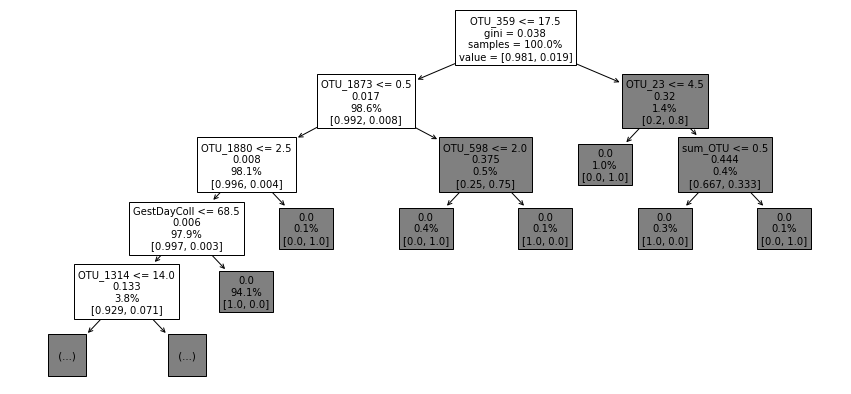

Delivered


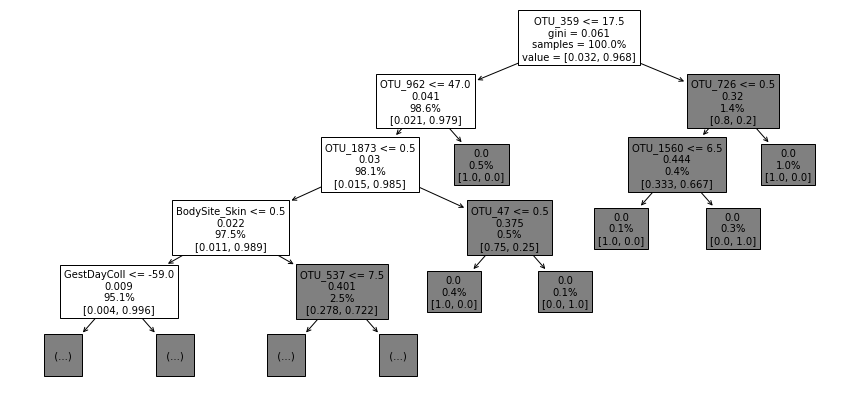

PPROM


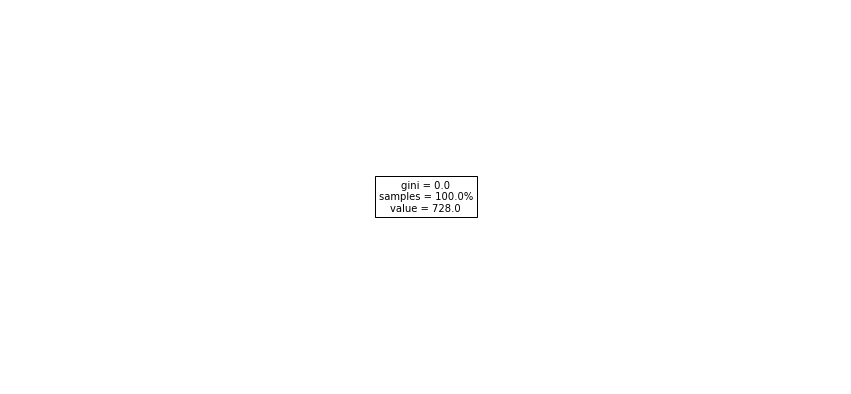

Hypertensive Disorder


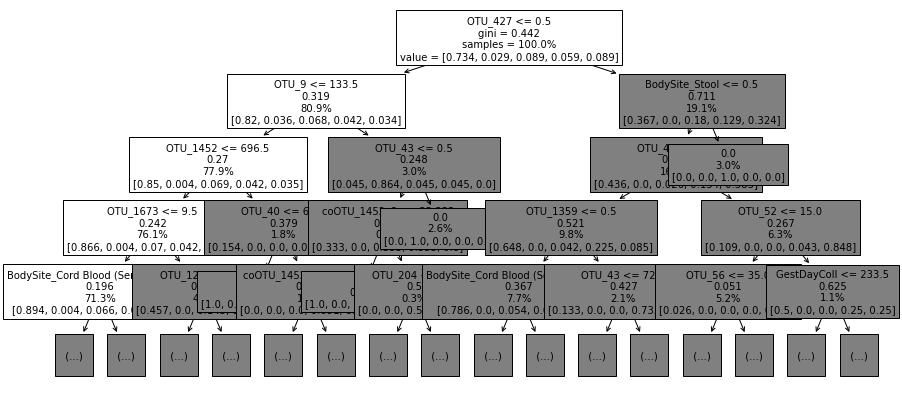

In [11]:
for i, col in enumerate(y_predict.columns):
    print(col)
    plt.figure(figsize = (15,7))
    tree.plot_tree(treemodels[i], max_depth = 4, feature_names = data.columns, fontsize = 10, label = 'root', proportion = True);
    plt.show()

In [9]:
for i in len(treemodels):
    print(treemodels.feature_importances_)

NameError: name 'treemodels' is not defined